In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pyproj
from shapely.ops import transform
from functools import partial

# Import custom functions from `scripts` folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts.clean_tweets import convert_shapefile_crs

pd.set_option('display.max_columns', 999)

# Initial data loading

In [2]:
# Read data, sample for quick analysis
df = pd.read_csv('../data/tweets/ba_2012.csv')
sample = df.sample(n=10000, random_state=42)

# Create a shapely.geometry.Point for each tweet
geometry = [Point(xy) for xy in zip(sample['lon'], sample['lat'])]
crs = {'init' :'epsg:4326'}

# Convert to GeoDataFrame, where each tweet's geometry is assigned to the lat/lon coords
gsample = gpd.GeoDataFrame(sample, crs=crs, geometry=geometry)

print(gsample.shape)
gsample.head()

/scratch/public/jsp/twitter-and-displacement/.env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10000, 18)


,id,u_id,lat,lon,created_at,type,place_type,u_created_at,u_followers_count,u_location,u_lang,u_statuses_count,u_name,u_screen_name,u_description,urls,text,geometry
2336234,261179657972510721,476492662,-34.579110,-58.423710,1351105057000,ll,NaN,1327729832000,103,NaN,es,2973,Caprichitos☺,AnnaPereyra96,29ECBAC2 Esta tonta se canso de tus mentiras ...,NaN,@juanfra1811 sii ahora te lo mando yoo,POINT (-58.42371 -34.57911)
101853,276160199818096640,365681324,-34.471703,-58.543444,1354676697000,ll,NaN,1314824692000,17,San Isidro,es,813,ShakyDuarte,ShakyDuarte,No hay sonido si no hay quien lo escuche ; no ...,NaN,Buscar hace media hora una buena imagen y enco...,POINT (-58.5434436 -34.4717031)
3186014,270730916949794816,858353072,-34.744759,-58.436618,1353382255000,ll,NaN,1349196582000,5,banfield,es,21,¡¡¡Liz!!!,Deliz29Di,chica de barrio,NaN,@AngeldebritoOk no hay doble elimi acion... se...,POINT (-58.436618 -34.744759)
2284462,252799966098096129,514414879,-34.649722,-58.660833,1349107183000,ll,NaN,1330872228000,29,"Ituzaingó, Bs. As. GF05qi",es,9649,LU8DO Ituzaingó BsAs,LU8DO,Datos emitidos automáticamente por estación me...,NaN,"Wind 6,2 km/h SSW. Barometer 1010,1 hPa, Risin...",POINT (-58.66083333 -34.64972222)
157833,234874205273985027,312093638,-34.571846,-58.546538,1344833348000,ll,NaN,1307374530000,841,Buenos Aires,es,2095,Ariel Vilachá,arielvilacha,Independiente. Marido de Roxana y padre de Roc...,NaN,@CarlosFedeRey @marce_stagnitti @mati_martinez...,POINT (-58.546538 -34.571846)


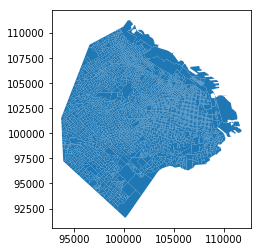

In [3]:
# Read Buenos Aires shapefiles
ba_shapefiles = gpd.read_file("../data/shapefiles/buenos_aires_shapefiles/radio_barrio_census_2010.shp")

# Note the coordinate system is not lat/lon
ba_shapefiles.plot();

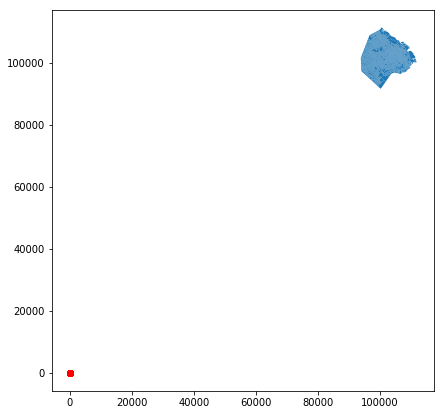

In [4]:
# Thus when we plot it with a sample of points, they are on different CRS projections
fig, ax = plt.subplots(figsize=(10, 7))
ba_shapefiles['geometry'].plot(ax=ax)
gsample.plot(ax=ax, marker='o', color='red', alpha=0.05);

# Converting shapefile CRS

[source](https://gis.stackexchange.com/a/127432)

In [5]:
ba_shapefiles = convert_shapefile_crs(ba_shapefiles)

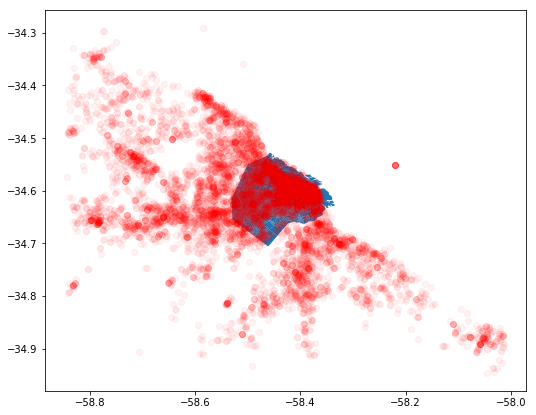

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
ba_shapefiles['geometry'].plot(ax=ax)
gsample.plot(ax=ax, marker='o', color='red', alpha=0.05);